# Bank Marketing with Machine Learning 

# AIM:

For the given marketing dataset, predict whether the customer will subscribe or not for a
term deposit (yes/no)

# Tasks to be performed:-

Business understanding:->Explore & Write short notes on dataset info & Business Problem

data understanding:-> EDA, Visualizations, Insights on Raw data, Qualitative and Quantitative analysis, Class imbalance

data preprocessing:->Missing value & Outlier treatment, Numerical and Categorica feature Transformation, Feature selection for modeling.

data validation:->Selecting Dependent & Independent variables by using train-test split.

Modeling:->Working on different classification models to predict binary outcome.

Algorithms to Try:

i)Logistic Regression

ii)Decision Trees (CART)

iii) Naïve Bayes

iv)K-Nearest Neighbors

v)Support Vector Machine

vi)Random Forest

# Introduction of the data

# Data Set:

The data is related with direct marketing campaigns. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed

#  About Features:

# Bank client data:

1) age      : (numeric)

2) job      : type of job (categorical: 'management','technician','entrepreneur','blue-collar','unknown',
              'retired','admin.','services','self-employed','unemployed','housemaid','student')

3) marital  : marital status (categorical: 'married','single','divorced' (note: 'divorced' means divorced or widowed)

4) education: (categorical: 'tertiary','secondary','unknown','primary')

5) default  : has credit in default? (categorical : 'no','yes')

6) housing  : has housing loan? (categorical: 'yes','no')

7) loan     : has personal loan? (categorical: 'no','yes')

# Related with the last contact of the current campaign:

8) contact: contact communication type (categorical: 'unknown','cellular','telephone')

9) day: last contact day of the week (numeric: 1-31)

10) month: last contact month of year (categorical: 'jan','feb','mar',.. , 'nov','dec')

11) duration: last contact duration, in seconds (numeric). 

12) balance:balance of the person ,(numeric)


# Other attributes:

13) campaign: number of contacts performed during this campaign and for this client (numeric: includes last contact)

14) pdays: number of days that passed by after the client was last contacted from a previous campaign.

15) previous: number of contacts performed before this campaign and for this client (numeric)

16) poutcome: outcome of the previous marketing campaign (categorical:'unknown' 'failure' 'other' 'success')

# Target variable:


17) y : has the client subscribed a term deposit? (binary: 'yes','no')

# Import required libraries:

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Business understanding:

# exploration of the data:


By using pandas package I loaded the dataset into the dataframe (df).

In [104]:
df=pd.read_csv("D:\datascience\projectsdatasets/classification.csv")

In [105]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# key points on data:

Marketing to potential clients has always been a crucial challenge in attaining success for banking institutions. It’s not a surprise that banks usually deploy mediums such as social media, customer service, digital media and strategic partnerships to reach out to customers. But how can banks market to a specific location, demographic, and society with increased accuracy? With the inception of machine learning - reaching out to specific groups of people have been revolutionized by using data and analytics to provide detailed strategies to inform banks which customers are more likely to subscribe to a financial product. In this project on bank marketing with machine learning, I will explain how a  bank can use predictive analytics from data science to help prioritize customers which would subscribe to a bank deposit.

The data set is based off the direct marketing campaigns . These marketing campaigns were based on phone calls. More than one contact to a client was required, in order to know if the product (bank term deposit) was subscribed by a client or not. The classification goal is to predict if a client will subscribe to the bank term deposit (yes/no).

1) The dataset contains 17 columns including the output (y). I am going to discard the output column  for our independent data  and i will use as ytrain, ytest.

2) Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

3) important note: balance is not affects the output target so it should be discarded if the intention is to have a realistic predictive model.

4) Use the remaining columns to find the most relatable independent variables (x) that will be able to predict if a customer will subscribe to a bank deposit or not

In [106]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# checking unique values:

In [108]:
# for each column
for a in list(df.columns):
    
    # get a list of unique values
    n = df[a].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 77 unique values
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
balance: 7168 unique values
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day: 31 unique values
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: 1573 unique values
campaign: 48 unique values
pdays: 559 unique values
previous: 41 unique values
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


# Exploratory data analysis:

Here i can classify the data into two parts i.e categorical data and numarical data so i can easily understand the data and i can show the  data easily in  a visualization point of view

# Visualization of Data:

# categorical graphical representation

In [109]:
categorical=['job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month','poutcome']

In [110]:
df[categorical].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
dtype: int64

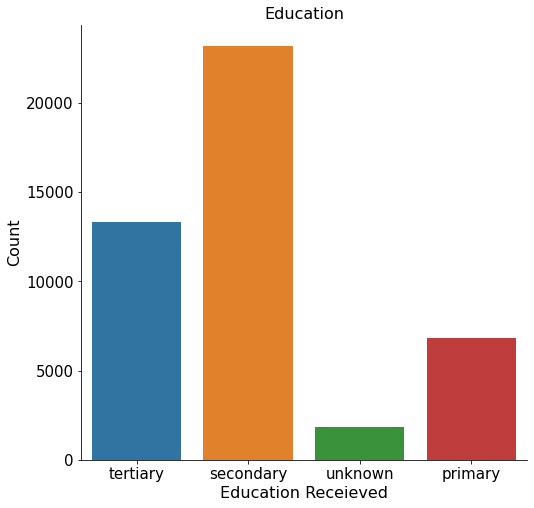

In [111]:
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(x = 'education', data = df)
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=15)
sns.despine()

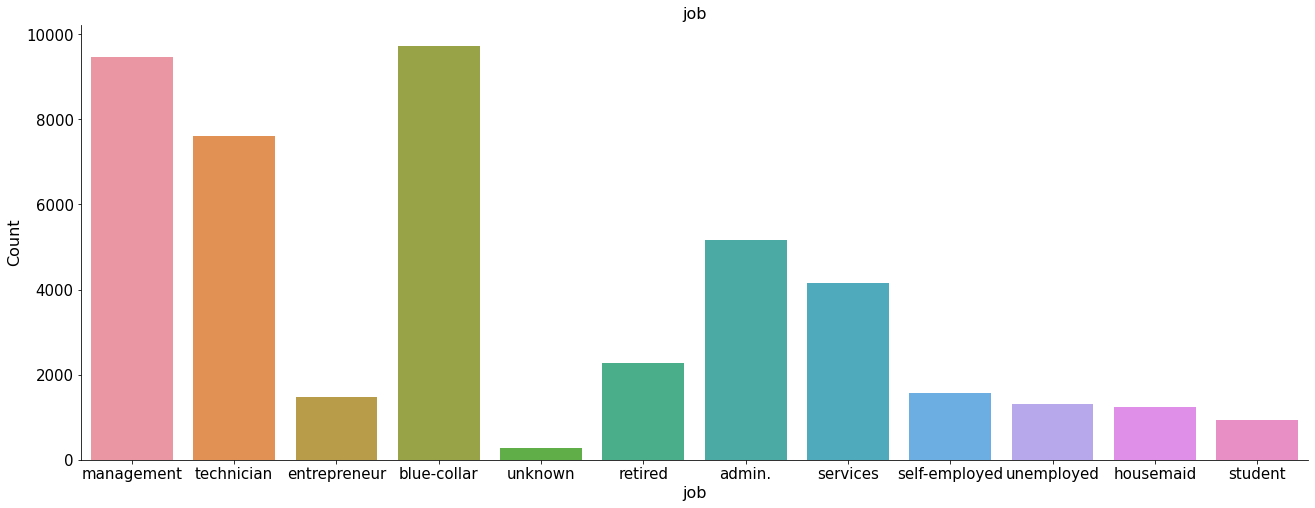

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
fig, ax = plt.subplots()
fig.set_size_inches(22, 8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('job', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('job', fontsize=16)
ax.tick_params(labelsize=15)
sns.despine()

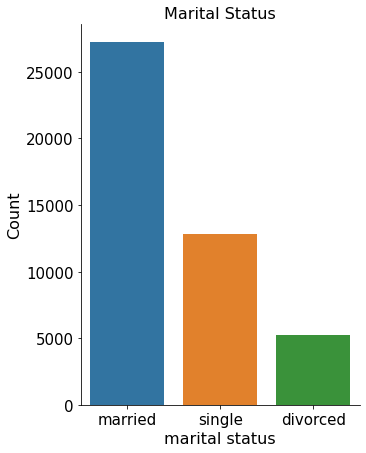

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
fig, ax = plt.subplots()
fig.set_size_inches(5, 7)
sns.countplot(x = 'marital', data = df)
ax.set_xlabel('marital status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital Status', fontsize=16)
ax.tick_params(labelsize=15)
sns.despine()

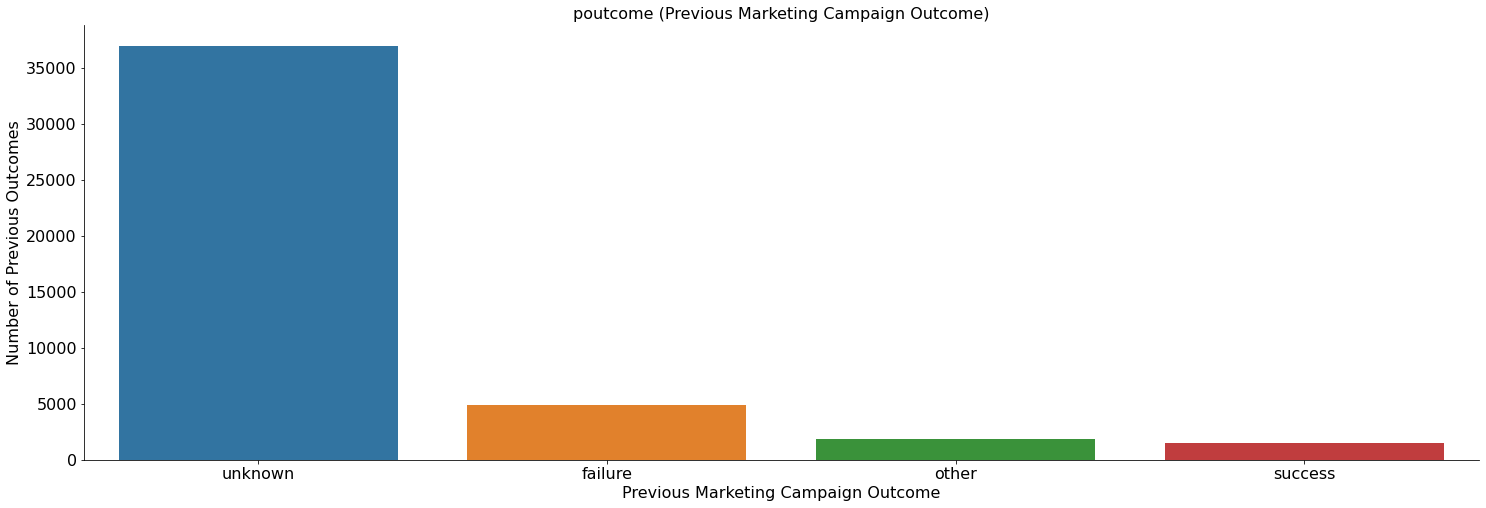

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = df)
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('Number of Previous Outcomes', fontsize=16)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

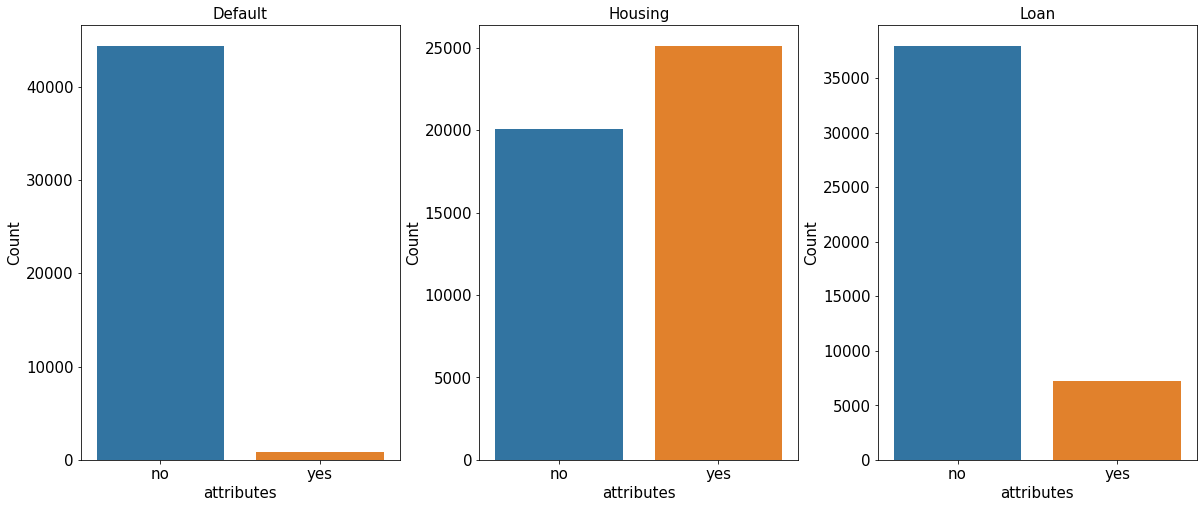

In [115]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data =df, ax = ax1, order = ['no','yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('attributes',fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = df, ax = ax2, order = ['no','yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('attributes',fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = df, ax = ax3, order = ['no','yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('attributes',fontsize=15)
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

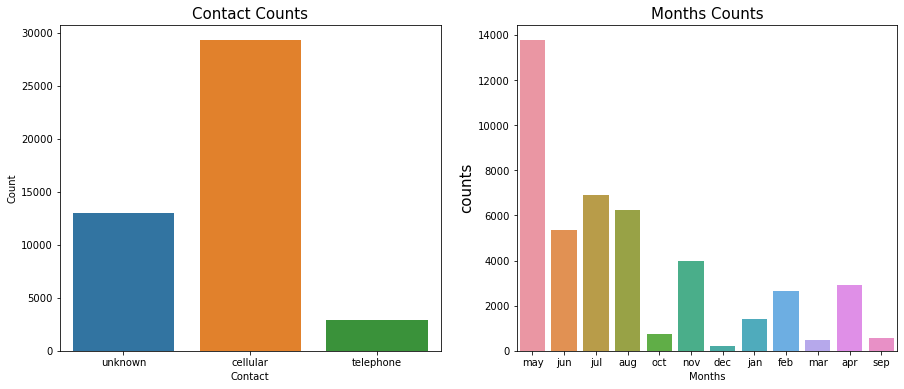

In [116]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.countplot(x="contact",data=df, ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts',fontsize=15)
ax1.tick_params(labelsize=10)

sns.countplot(x="month",data=df, ax = ax2, order = ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb','mar', 'apr', 'sep'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('counts',fontsize=15)
ax2.set_title('Months Counts',fontsize=15)
ax2.tick_params(labelsize=10)


plt.subplots_adjust(wspace=0.20)

# Numarical graphical representation

In [117]:
numaric=['age','day','campaign', 'pdays','previous']

In [118]:
df[numaric].isnull().sum()

age         0
day         0
campaign    0
pdays       0
previous    0
dtype: int64

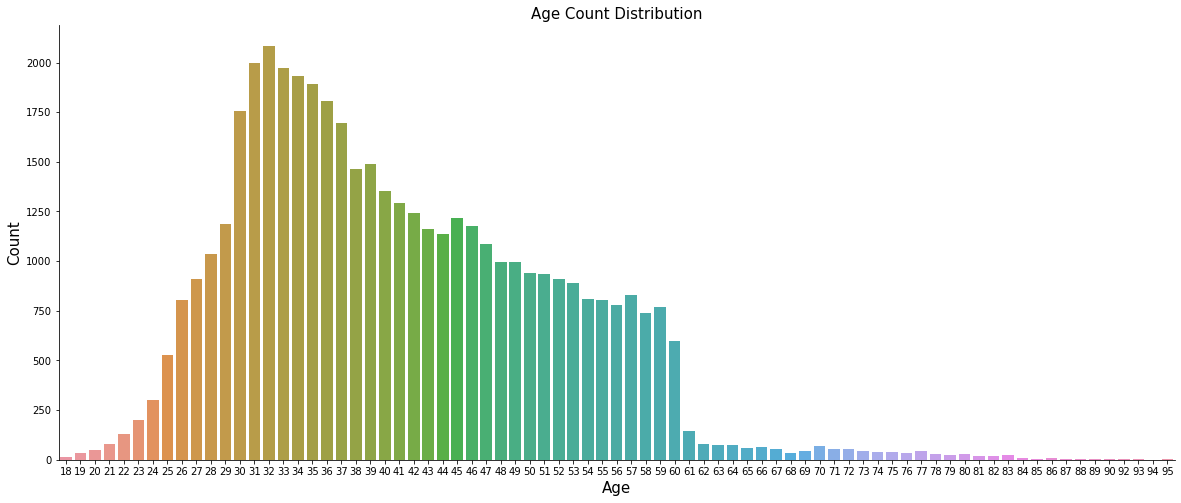

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

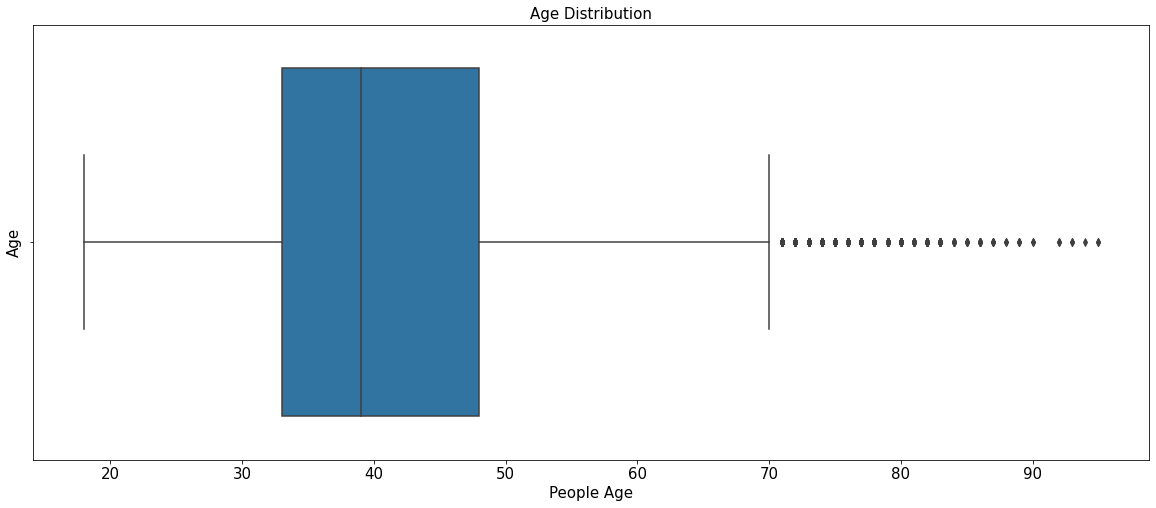

In [120]:
import warnings
warnings.filterwarnings("ignore")
fig, ax1 = plt.subplots()
fig.set_size_inches(20,8)
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)


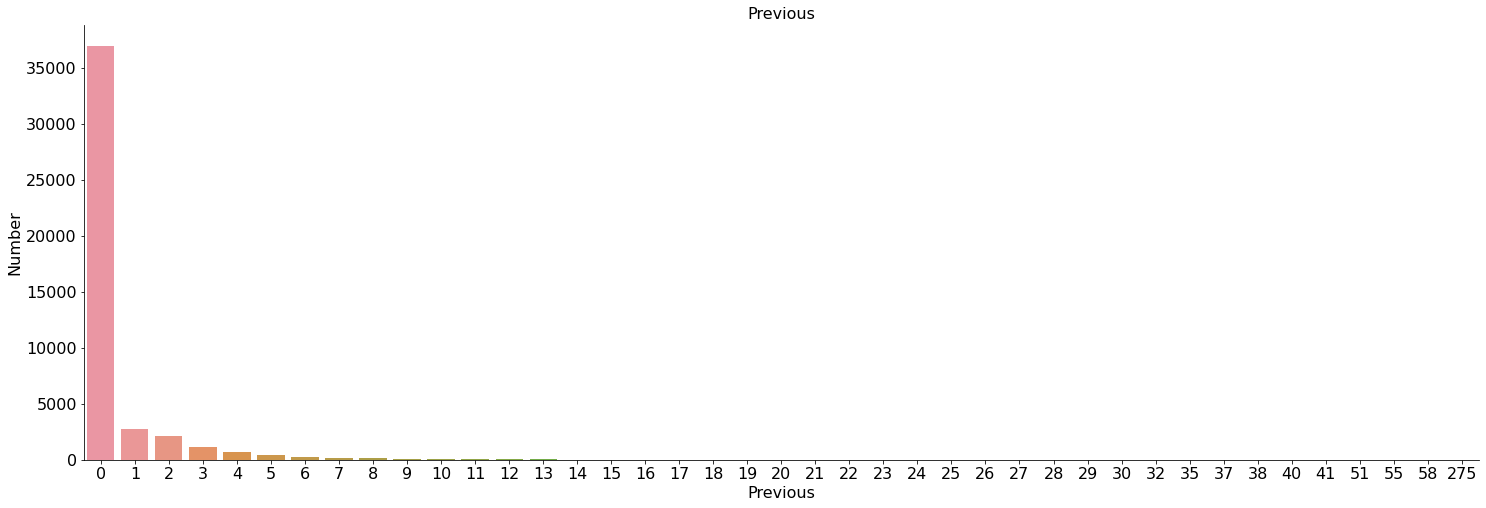

In [121]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'previous', data = df)
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

# Preprocessing of the data:

In [122]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


checking null values in dataset

In [123]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Dependent Data


I create one dependent dataframe called  as "y" and in that dataframe having  coloum name as output which is going to represent 0 for the negative class and 1 for the positive class based on the bank marketing data set

In [124]:
y=pd.get_dummies(df["y"],drop_first=True,columns="output")

In [125]:
y.columns=["output"]

In [126]:
y.head()

,output
0,0
1,0
2,0
3,0
4,0


# Numaric features


These are numeric data. The numerical columns that we will use can be seen below:

In [127]:
numaric

['age', 'day', 'campaign', 'pdays', 'previous']

In [128]:
numaric_df=df[numaric]

In [129]:
numaric_df.head()

,age,day,campaign,pdays,previous
0,58,5,1,-1,0
1,44,5,1,-1,0
2,33,5,1,-1,0
3,47,5,1,-1,0
4,33,5,1,-1,0


# Categorical features:


These are Categorical data. The categorical columns that we will use can be seen below:

In [130]:
categorical_df=df[categorical]

In [131]:
categorical_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown



Categorical variables are non-numeric data such as job and education. To turn these non-numerical data into variables, the simplest thing is to use a technique called get_dummies, which will be explained below.


In [132]:
categorical_df.shape

(45211, 9)

# Encoding Technique:

# get-dummies:

To convert our categorical features to numbers, we will use a technique called get_dummies. In get-dummies, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. For example, for the column job, we would create new columns.

In [133]:
categorical_df=pd.get_dummies(categorical_df,drop_first=True)

In [134]:
categorical_df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [135]:
categorical_df.shape

(45211, 35)

# concatenation:

concatenation the numaric dataset and categorical dataset

i given new dataset name as X because total features are independent features

# Independent Data

In [136]:
X=pd.concat([numaric_df,categorical_df],axis=1)

In [137]:
X.head()

,age,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,5,1,-1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,5,1,-1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,5,1,-1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,5,1,-1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,5,1,-1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


# Building Training & Test Samples:



So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into two parts:

Training samples: these are samples from the data set used to train the model. It can be 80% of the data.

Test samples: these are samples used to measure the accuracy or performace of the model. It can be 20% of the data.

In this project, we will split into 80% train and 20% test.

Let's shuffle the samples using sample in case there was some order (e.g. all positive samples on top). Here n is the number of samples.

Shuffle the samples

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20)

In [140]:
Xtrain.shape

(36168, 40)

In [141]:
Xtest.shape

(9043, 40)

In [142]:
ytrain.shape

(36168, 1)

In [143]:
ytest.shape

(9043, 1)

# Model Selection:

 
 
In this section, we will first compare the performance of the following 7 machine learning models using default hyperparameters






# Baseline models:


1)Logistic regression

2)K-nearest neighbors

3)Naive Bayes

4)Decision tree

5)SVM

6)Random forest

# LogisticRegression:


Logsitic regression uses a line (Sigmoid function) in the form of an "S" to predict if the dependent variable is true or false based on the independent variables. The "S-shaped" curve (on the line graph) will show the probability of the dependent variable occuring based on where the points of the independent variables lands on the curve. In this case, the output (y) is predicted by the numerical and categorical variables defined as "x" such as age, education and so on. Logistic regresssion is best used for classifying samples


Training and evaluating the logistic regression performance

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
lr=LogisticRegression()

In [146]:
lr.fit(Xtrain,ytrain)

LogisticRegression()

In [147]:
lr.score(Xtest,ytest)*100

89.54992812119872

# k-Nearest Neighbor(knn):


K Nearest Neighbors looks at the k closest datapoints and probability sample that has positive labels. It is easy to implement, and you don't need an assumption for the data structure. KNN is also good for multivariate analysis.


Training and evaluating the KNN performance

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
import math
math.sqrt(len(Xtest))

95.0946896519464

In [150]:
nn=KNeighborsClassifier( metric='euclidean', n_neighbors=93)

In [151]:
nn.fit(Xtrain,ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=93)

In [152]:
nn.score(Xtest,ytest)*100

88.89748977109366

# Decision tree:


Decision trees works through the data to decide if one action occurs, what will then be the result of a "yes" and a "no". It works each data making the decision of which path to take based on the answer. Because of this decision making process, this algorithm has no assumptions about the structure of the data, but instead decides on the path to take through each decision the algorithm performs.

Training and evaluating Decision Tree model performance

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
dt=DecisionTreeClassifier( criterion='gini', splitter='best', max_depth=5)

In [155]:
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=5)

In [156]:
dt.score(Xtest,ytest)*100

89.66051089240297

# NaiveBayes:

Naive Bayes assumes that all variables in the dataset are independent of each other. Meaning that there are no dependent variables or output. This algorithm uses Bayes rule which calculated the probability of an event related to previous knowledge of the variables concerning the event. This won't really work in this case since we have an output of the bank customers who will get a bank deposit. This process is better for tasks such as image processing

Training and evaluating Naive Bayes model performance

In [157]:
from sklearn.naive_bayes import GaussianNB

In [158]:
gnb=GaussianNB()

In [159]:
gnb.fit(Xtrain,ytrain)

GaussianNB()

In [160]:
gnb.score(Xtrain,ytrain)*100

85.03096660030967

# Support Vector Machine (SVM):

svm is mainly used for classify the data set into multiple class based on similarity.And this classification is done by drawing the hyperplane between the similarity classes.Svm is used for binary classification only.

Training and evaluating SVM model performance

In [161]:
from sklearn.svm import SVC

In [162]:
sv=SVC(  C=1.0,kernel='rbf',degree=3,gamma='scale',)

In [163]:
sv.fit(Xtrain,ytrain)

SVC()

In [164]:
sv.score(Xtest,ytest)*100

88.67632422868516

# RandomForest:

Random forest works like a decision tree algorithm but it performs various decision tree analysis on the dataset as a whole. That is, it is the bigger version of the decision tree; a forest is bigger than a tree, you can think of it that way. Random forest takes random samples of trees and it works faster than the decision tree algorithm.

Training and evaluating Random Forest model performance

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rf=RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=5)

In [167]:
rf.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [168]:
rf.score(Xtest,ytest)*100

89.54992812119872

# Tuning the hyperparameter:

# DecisionTree:

 
I got best score in decision tree so i have to apply hyper parameter in decision tree so that i can get more score

In [169]:
list1=["gini","entropy"]
list2=["best","random"]

In [170]:
for i in list1:
    for j in list2:
        print(i,j,sep=":")
        dt=DecisionTreeClassifier(criterion=i, splitter=j, max_depth=5)
        dt.fit(Xtrain,ytrain)
        print(dt.score(Xtest,ytest)*100)
        print("*****************")

gini:best
89.66051089240297
*****************
gini:random
89.60521950680084
*****************
entropy:best
89.69368572376423
*****************
entropy:random
89.64945261528254
*****************


# Best classifier:


I got best sore in decision tree in that criterion is gini and splitter is random

In [171]:
dt1=DecisionTreeClassifier(criterion="gini", splitter="random", max_depth=5)

In [172]:
dt1.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, splitter='random')

In [173]:
dt1.score(Xtest,ytest)*100

89.62733606104169

# result:

In [174]:
result={"classifier":["logisticRegression","knn","DecisionTree","svm","naivebayes","rondamforest"],
       "score":[89.12971359062259,88.67632422868516,89.26241291606767,88.31140108371116,85.05308560053085,89.08548048214088]}

In [175]:
result

{'classifier': ['logisticRegression',
  'knn',
  'DecisionTree',
  'svm',
  'naivebayes',
  'rondamforest'],
 'score': [89.12971359062259,
  88.67632422868516,
  89.26241291606767,
  88.31140108371116,
  85.05308560053085,
  89.08548048214088]}

In [176]:
finalresult_df=pd.DataFrame(result)

In [177]:
finalresult_df

,classifier,score
0,logisticRegression,89.129714
1,knn,88.676324
2,DecisionTree,89.262413
3,svm,88.311401
4,naivebayes,85.053086
5,rondamforest,89.085480


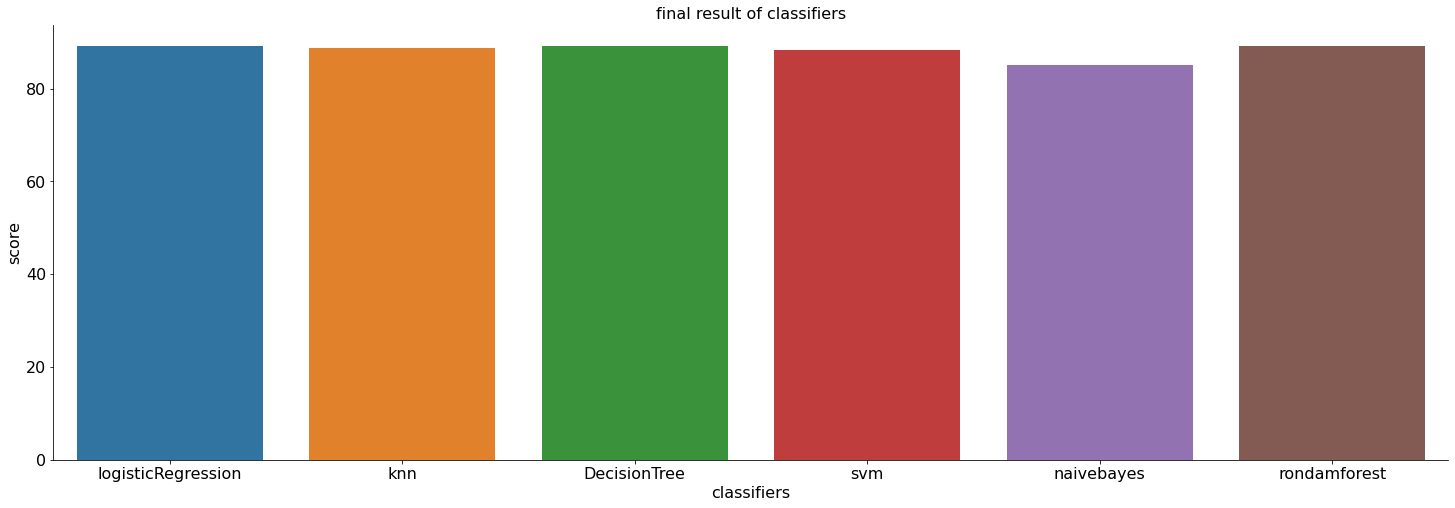

In [178]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.barplot(finalresult_df["classifier"],finalresult_df["score"])
ax.set_xlabel('classifiers', fontsize=16)
ax.set_ylabel('score', fontsize=16)
ax.set_title('final result of classifiers', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()